In [7]:
#standard imports 
import numpy as np
import matplotlib.pyplot as plt

# Superiorization

This file gives a short introduction on how to set up a superiorization example.

In [8]:
# import the superiorization package
from suppy.superiorization import Superiorization


In [9]:
Superiorization?

Init signature:
Superiorization(
    basic,
    perturbation_scheme: suppy.perturbations._base.Perturbation,
    objective_tol: float = 0.0001,
    constr_tol: float = 1e-06,
)
Docstring:     
Superiorization algorithm for constrained optimization problems.

Parameters
----------
basic : Callable
    The underlying feasibility seeking algorithm.
perturbation_scheme : Perturbation
    The perturbation scheme to be used for superiorization.
objective_tol : float, optional
    Tolerance for the objective function value change to determine stopping criteria, by default 1e-4.
constr_tol : float, optional
    Tolerance for the constraint proximity value change to determine stopping criteria, by default 1e-6.

Attributes
----------
basic : Callable
    The underlying feasibility seeking algorithm.
perturbation_scheme : Perturbation
    The perturbation scheme to be used for superiorization.
objective_tol : float
    Tolerance for the objective function value change to determine stopping crite

To set up a superiorization model an underlying feasibility seeking (basic) algorithm is needed, as well as a perturbation scheme.

## Feasibility seeking/basic algorithm

Projection based feasibility seeking algorithms can be imported from the *suptestpy.feasibility* or *suptestpy.projections package*. 
Let's set up a simple 2D example consisting of overlapping bands.

In [10]:
from suppy.projections import BandProjection, SequentialProjection

In [11]:
band_1 = BandProjection(np.array([1,2]), 3,4)
band_2 = BandProjection(np.array([-1,1.5]), 1,2)
seq_proj = SequentialProjection([band_1, band_2])

## For simple 2d objects a visualization is possible

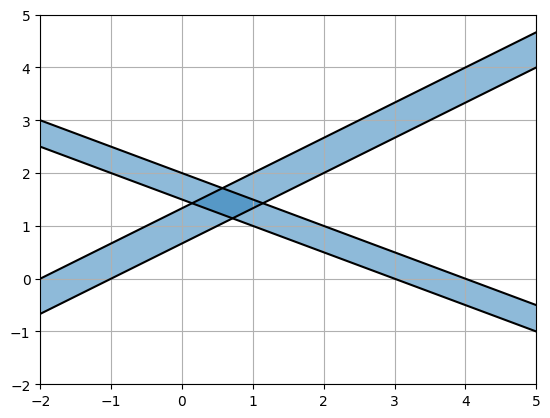

In [12]:
#visualize the system and the projections 
fig,ax = plt.subplots()
seq_proj.visualize(ax)
ax.set_xlim(-2,5)
ax.set_ylim(-2,5)
ax.grid()

### We can also solve this model directly using the feasibility seeking algorithm:

C:\Users\t590r\Documents\GitHub\suppy\suppy\utils\_decorators.py:35: UserWarning: Array is not of type float32 or float64, converting to float64
  warnings.warn("Array is not of type float32 or float64, converting to float64")


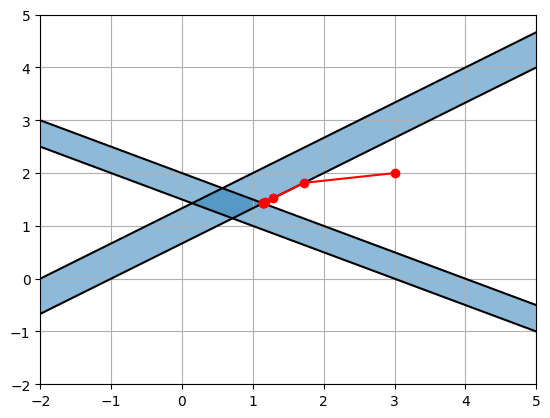

In [13]:
x_f = seq_proj.solve(np.array([3,2]), 1000,storage = True)
fig,ax = plt.subplots()
seq_proj.visualize(ax)
ax.set_xlim(-2,5)
ax.set_ylim(-2,5)
plt.plot(x_f[0], x_f[1], 'ro')
plt.plot(seq_proj.all_x[:,0], seq_proj.all_x[:,1], '-o',color = 'red')
ax.grid()

## Moving to superiorization
To set up a superiorization model we require a perturbation scheme
### Setting up a perturbation scheme

We want to perform a perturbation with respect to an objective function by performing a gradient step. 

In [14]:
from suppy.perturbations import PowerSeriesGradientPerturbation
PowerSeriesGradientPerturbation?

Init signature:
PowerSeriesGradientPerturbation(
    func: Callable,
    grad: Callable,
    func_args: List = [],
    grad_args: List = [],
    n_red=1,
    step_size=0.5,
    n_restart=-1,
)
Docstring:     
Objective function perturbation using gradient descent with step size
reduction according to a power series.
Has the option to "restart" the power series after a certain number of
steps.

func : Callable
    The function to be optimized.
grad : Callable
    The gradient of the function to be optimized.
func_args : List, optional
    Additional arguments to be passed to the function, by default [].
grad_args : List, optional
    Additional arguments to be passed to the gradient function, by default [].
n_red : int, optional
    The number of reductions, by default 1.
step_size : float, optional
    The step size for the gradient descent, by default 0.5.
n_restart : int, optional
    The number of steps after which to restart the power series, by default -1 (no restart).
File:      

As the underlying objective function we use the squared distance to the coordinate center.

In [15]:
def func_1(x):
    return 1/len(x)*(x**2).sum(axis = 0)

def grad_1(x):
    grad = 1/len(x)*2*x
    return grad/np.sqrt(np.sum(grad**2))

In [16]:
pert = PowerSeriesGradientPerturbation(func_1,grad_1)

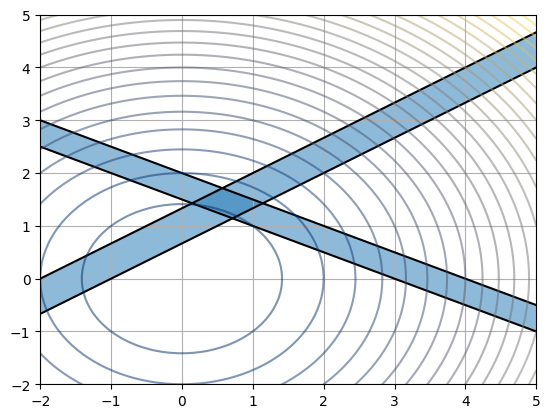

In [17]:
#visualize the system and the projections 
fig,ax = plt.subplots()
seq_proj.visualize(ax)
ax.set_xlim(-2,5)
ax.set_ylim(-2,5)

x_p = np.linspace(-5,5,100)
X,Y = np.meshgrid(x_p,x_p)
Z = func_1(np.array([X,Y]))
ax.contour(X,Y,Z,30,alpha = 0.5,cmap = 'cividis')
ax.grid()

In [18]:
# Set up and solve the superiorization model

In [19]:
sup_model = Superiorization(seq_proj,pert)

In [20]:
sup_model.solve(np.array([3,2]), 1000,storage = True)

Current iteration: 0
Current iteration: 10


array([0.72395789, 1.14930526])

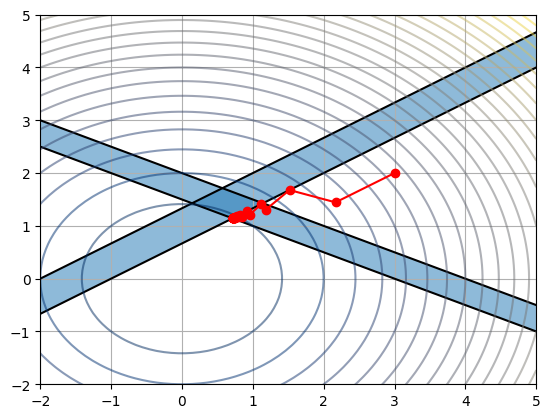

In [21]:
#visualize the system and the projections 
fig,ax = plt.subplots()
seq_proj.visualize(ax)
ax.set_xlim(-2,5)
ax.set_ylim(-2,5)

x_p = np.linspace(-5,5,100)
X,Y = np.meshgrid(x_p,x_p)
Z = func_1(np.array([X,Y]))
ax.contour(X,Y,Z,30,alpha = 0.5,cmap = 'cividis')
ax.grid()
plt.plot(sup_model.all_x[:,0], sup_model.all_x[:,1], '-o',color = 'red')